In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#importing the training data set
X = pd.read_csv('volcanoe-data/volcanoes_train/train_images.csv',header= None)
y = pd.read_csv('volcanoe-data/volcanoes_train/train_labels.csv')

In [3]:
# going to use the type column as my target. I will change nans to 5 which would encode "no volcano".
y = y['Type']

In [4]:
y = y.fillna(5.0)

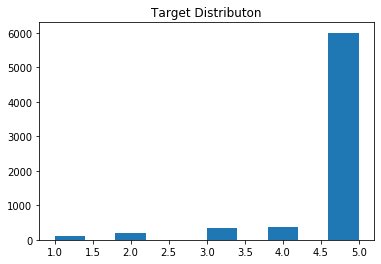

In [5]:
plt.hist(y)
plt.title('Target Distributon')
#plt.savefig('images/reg_targ_dist.png')
#Type : 1= defin itely a volcano,2 =probably, 3= possibly, 4= onlya pit is visible ,5 no volcano


In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, MaxPool2D, Dropout



In [6]:
#normalizing image
Xtrain =  X/256
ytrain = y

In [5]:
img_rows, img_cols = 110, 110

In [7]:
X = Xtrain.values.reshape((-1, img_rows, img_cols, 1))
y = ytrain.values
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size = 0.2, random_state = 666)

In [6]:
# keeping my model3 almost the same but change my final activation function  to linear and change loss to and metrics acordngly

modelCNN4 = Sequential()
modelCNN4.add(Conv2D(6, kernel_size = (3,3), activation = 'relu', input_shape = (img_rows, img_cols, 1)))
modelCNN4.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN4.add(Dropout(0.5))
modelCNN4.add(Conv2D(12, kernel_size = (3,3), activation = 'relu'))
modelCNN4.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN4.add(Dropout(0.5))
modelCNN4.add(Flatten())
modelCNN4.add(Dense(12,activation = 'relu'))
modelCNN4.add(Dense(1, activation = 'linear'))


In [10]:
modelCNN4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 108, 108, 6)       60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 54, 54, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 54, 54, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 52, 52, 12)        660       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 12)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8112)              0

In [7]:
modelCNN4.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error','MeanAbsoluteError','RootMeanSquaredError'])

In [256]:
epochs =5
batch_size = 32

In [14]:
history4 = modelCNN4.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_vali, y_vali)
                       )

Epoch 1/15
175/175 [==============================] - 14s 82ms/step - loss: 1.2484 - mean_squared_error: 1.2484 - val_loss: 13.4263 - val_mean_squared_error: 13.4263
Epoch 2/15
175/175 [==============================] - 17s 99ms/step - loss: 0.7223 - mean_squared_error: 0.7223 - val_loss: 12.9659 - val_mean_squared_error: 12.9659
Epoch 3/15
175/175 [==============================] - 18s 105ms/step - loss: 0.7296 - mean_squared_error: 0.7296 - val_loss: 10.2205 - val_mean_squared_error: 10.2205
Epoch 4/15
175/175 [==============================] - 17s 100ms/step - loss: 0.7158 - mean_squared_error: 0.7158 - val_loss: 9.1657 - val_mean_squared_error: 9.1657
Epoch 5/15
175/175 [==============================] - 17s 99ms/step - loss: 0.6781 - mean_squared_error: 0.6781 - val_loss: 7.7724 - val_mean_squared_error: 7.7724
Epoch 6/15
175/175 [==============================] - 22s 123ms/step - loss: 0.6507 - mean_squared_error: 0.6507 - val_loss: 7.7214 - val_mean_squared_error: 7.7214
Epoch 7

In [15]:
modelCNN4.save("reg_model.h5")

In [8]:
# learning rate plot functionin src
from src.volcano import lr_plot
lr_plot(history4,'CNN 4 : Loss and MSE')

In [23]:
history4_obj = history4.history

In [31]:
pred = modelCNN4(X_vali)

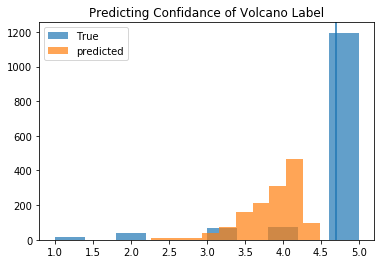

In [90]:
plt.hist(y_vali,alpha=.7,label='True')
plt.hist(pred.numpy(),alpha=.7, label='predicted')
plt.legend()
plt.title('Predicting Confidance of Volcano Label')
plt.axvline(np.average(y_vali));

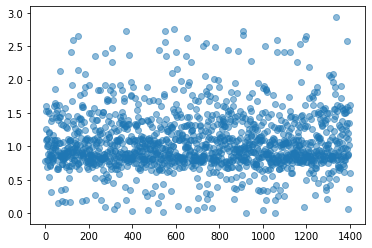

In [96]:
plt.scatter(list(range(len(res))),np.sqrt(res**2),alpha=.5)

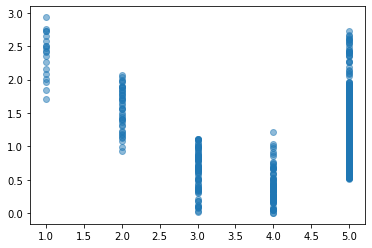

In [98]:
plt.scatter(y_vali,np.sqrt(res**2),alpha=.5)

In [57]:
pred_flat = pred.numpy().flatten()


In [60]:
res = y_vali - pred_flat

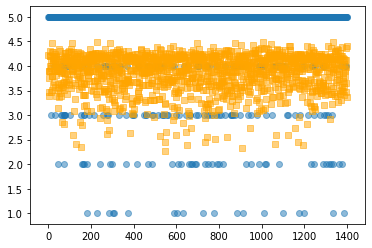

In [79]:
#plt.scatter(list(range(len(res))),res)
plt.scatter(list(range(len(res))),y_vali,label='true',alpha=.5)
plt.scatter(list(range(len(res))),pred_flat,marker='s',label='pred',color='orange',alpha=.5)

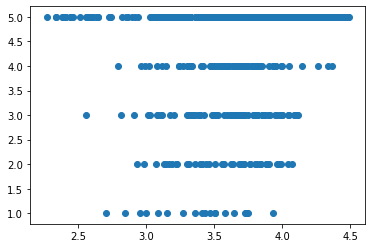

In [64]:
plt.scatter(pred_flat, y_vali)

In [3]:
from sklearn.metrics import r2_score

In [67]:
r2_score(y_vali,pred_flat)

-1.0236854450513886

## this model sucks lets try to predict the radius of a volcano 


In [9]:
X = pd.read_csv('volcanoe-data/volcanoes_train/train_images.csv',header= None)


In [10]:
y = pd.read_csv('volcanoe-data/volcanoes_train/train_labels.csv')

''

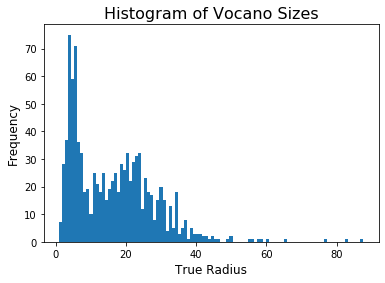

In [11]:
plt.hist(y['Radius'][y['Radius'].notnull()],bins=100)
plt.xlabel('True Radius',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Histogram of Vocano Sizes',fontsize = 16)
#plt.savefig('images/radius_hist.png')
;

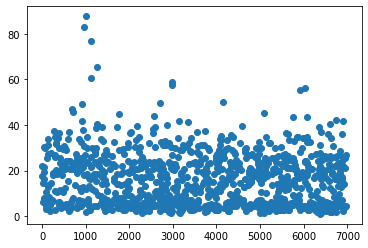

In [116]:
plt.scatter(y[y['Radius'].notnull()].index.values,y['Radius'][y['Radius'].notnull()])

In [12]:
#filtering data for only samples with a radius measurment
X_rad = X[y['Radius'].notnull()]
y_rad = y[y['Radius'].notnull()]['Radius']
#normalizing image
X_rad =  X_rad/256

In [11]:
X_rad.shape

(1000, 12100)

In [12]:
y_rad.shape

(1000,)

In [13]:
img_rows, img_cols = 110, 110

X = X_rad.values.reshape((-1, img_rows, img_cols, 1))
y = y_rad.values
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size = 0.2, random_state = 666)

In [145]:
'''modelCNNr = Sequential()
modelCNNr.add(Conv2D(6, kernel_size = (3,3), activation = 'relu', input_shape = (img_rows, img_cols, 1)))
modelCNNr.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNNr.add(Dropout(0.5))
modelCNNr.add(Conv2D(12, kernel_size = (3,3), activation = 'relu'))
modelCNNr.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNNr.add(Dropout(0.5))
modelCNNr.add(Flatten())
modelCNNr.add(Dense(12,activation = 'relu'))
modelCNNr.add(Dense(1, activation = 'linear'))'''

In [146]:
'''modelCNNr.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])'''

In [15]:
epochs=15
batch_size=32

In [16]:
# NOTE: CNN4 was  reinstancaited and compiled to before moving onto prediting radius
historyr = modelCNN4.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_vali, y_vali)
                       )

Epoch 1/15
25/25 [==============================] - 2s 70ms/step - loss: 158.9771 - mean_squared_error: 158.9771 - mean_absolute_error: 10.0041 - root_mean_squared_error: 12.6086 - val_loss: 266.8585 - val_mean_squared_error: 266.8585 - val_mean_absolute_error: 11.2420 - val_root_mean_squared_error: 16.3358
Epoch 2/15
25/25 [==============================] - 2s 65ms/step - loss: 129.1817 - mean_squared_error: 129.1817 - mean_absolute_error: 9.2797 - root_mean_squared_error: 11.3658 - val_loss: 272.1018 - val_mean_squared_error: 272.1018 - val_mean_absolute_error: 11.3749 - val_root_mean_squared_error: 16.4955
Epoch 3/15
25/25 [==============================] - 2s 65ms/step - loss: 130.8717 - mean_squared_error: 130.8717 - mean_absolute_error: 9.2745 - root_mean_squared_error: 11.4399 - val_loss: 246.7754 - val_mean_squared_error: 246.7754 - val_mean_absolute_error: 10.7849 - val_root_mean_squared_error: 15.7091
Epoch 4/15
25/25 [==============================] - 2s 65ms/step - loss: 13

In [101]:
def lr_plot_reg(history_obj,model_name):
    ''' input : model , model_name : tf model, str'''
    history = history_obj.history
    x_arr = np.arange(len(history['loss']))+1
    fig = plt.figure(figsize=(12,4))
    ax= fig.add_subplot(1,2,1)
    ax.plot(x_arr,history['mean_absolute_error'],'--',label='train MAE')
    ax.plot(x_arr,history['val_mean_absolute_error'],'--',label='validation MAE')
    ax.legend()
    ax.set_xlabel('Epoch',size=15)
    ax.set_ylabel('Score',size=15)
    plt.grid()

    ax = fig.add_subplot(1,2,2)
    ax.plot(x_arr,history['mean_squared_error'],'--',label='train MSE')
    ax.plot(x_arr,history['val_mean_squared_error'],'--',label='val MSE')
    ax.legend()
    ax.set_xlabel('Epochs',size=15)
    #ax.set_ylabel('Score',size=15)
    fig.suptitle(model_name,fontsize='16')
    plt.grid()
    plt.savefig('/home/rachel/Galvanize/capstone2/Cap2-repo/images/lr_plot_radiusCNN5_315.png')
    #plt.show()

In [19]:
historyr.history

{'loss': [158.97706604003906,
  129.18165588378906,
  130.87167358398438,
  132.56622314453125,
  134.34042358398438,
  132.40753173828125,
  133.1512908935547,
  128.46583557128906,
  130.8046112060547,
  131.1348419189453,
  128.70399475097656,
  126.31253051757812,
  128.68743896484375,
  127.51683807373047,
  129.8647003173828],
 'mean_squared_error': [158.97706604003906,
  129.18165588378906,
  130.87167358398438,
  132.56622314453125,
  134.34042358398438,
  132.40753173828125,
  133.1512908935547,
  128.46583557128906,
  130.8046112060547,
  131.1348419189453,
  128.70399475097656,
  126.31253051757812,
  128.68743896484375,
  127.51683807373047,
  129.8647003173828],
 'mean_absolute_error': [10.004080772399902,
  9.27972412109375,
  9.274496078491211,
  9.378002166748047,
  9.34481430053711,
  9.316425323486328,
  9.382688522338867,
  9.23800277709961,
  9.304062843322754,
  9.225491523742676,
  9.193557739257812,
  9.13644790649414,
  9.246803283691406,
  9.167071342468262,
  

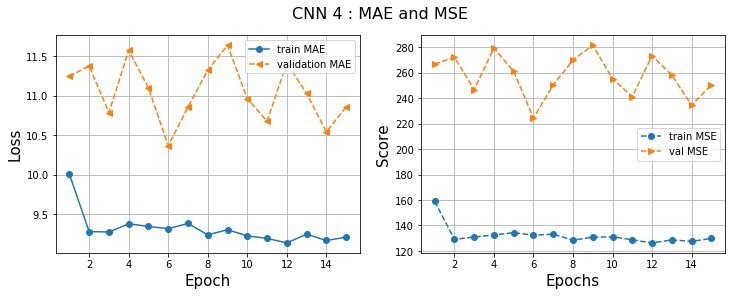

In [23]:
lr_plot_reg(historyr,'CNN 4 : MAE and MSE')

In [25]:
epochs = 100

In [26]:
historyr2 = modelCNN4.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_vali, y_vali)
                       )

Epoch 1/100
25/25 [==============================] - 2s 66ms/step - loss: 127.1786 - mean_squared_error: 127.1786 - mean_absolute_error: 9.1939 - root_mean_squared_error: 11.2774 - val_loss: 252.8227 - val_mean_squared_error: 252.8227 - val_mean_absolute_error: 10.9058 - val_root_mean_squared_error: 15.9004
Epoch 2/100
25/25 [==============================] - 2s 65ms/step - loss: 126.8091 - mean_squared_error: 126.8091 - mean_absolute_error: 9.1816 - root_mean_squared_error: 11.2610 - val_loss: 241.5934 - val_mean_squared_error: 241.5934 - val_mean_absolute_error: 10.6768 - val_root_mean_squared_error: 15.5433
Epoch 3/100
25/25 [==============================] - 2s 65ms/step - loss: 134.7680 - mean_squared_error: 134.7680 - mean_absolute_error: 9.4139 - root_mean_squared_error: 11.6090 - val_loss: 244.7122 - val_mean_squared_error: 244.7122 - val_mean_absolute_error: 10.7377 - val_root_mean_squared_error: 15.6433
Epoch 4/100
25/25 [==============================] - 2s 65ms/step - loss:

25/25 [==============================] - 2s 85ms/step - loss: 125.2833 - mean_squared_error: 125.2833 - mean_absolute_error: 8.9026 - root_mean_squared_error: 11.1930 - val_loss: 229.4343 - val_mean_squared_error: 229.4343 - val_mean_absolute_error: 10.4345 - val_root_mean_squared_error: 15.1471
Epoch 28/100
25/25 [==============================] - 2s 83ms/step - loss: 125.4320 - mean_squared_error: 125.4320 - mean_absolute_error: 8.9854 - root_mean_squared_error: 11.1996 - val_loss: 230.7855 - val_mean_squared_error: 230.7855 - val_mean_absolute_error: 10.4566 - val_root_mean_squared_error: 15.1916
Epoch 29/100
25/25 [==============================] - 2s 86ms/step - loss: 123.4647 - mean_squared_error: 123.4647 - mean_absolute_error: 8.9895 - root_mean_squared_error: 11.1115 - val_loss: 234.5584 - val_mean_squared_error: 234.5584 - val_mean_absolute_error: 10.5217 - val_root_mean_squared_error: 15.3153
Epoch 30/100
25/25 [==============================] - 2s 84ms/step - loss: 125.7394

25/25 [==============================] - 2s 85ms/step - loss: 116.0492 - mean_squared_error: 116.0492 - mean_absolute_error: 8.5215 - root_mean_squared_error: 10.7726 - val_loss: 217.8626 - val_mean_squared_error: 217.8626 - val_mean_absolute_error: 10.0715 - val_root_mean_squared_error: 14.7602
Epoch 54/100
25/25 [==============================] - 2s 84ms/step - loss: 112.0418 - mean_squared_error: 112.0418 - mean_absolute_error: 8.3129 - root_mean_squared_error: 10.5850 - val_loss: 212.0846 - val_mean_squared_error: 212.0846 - val_mean_absolute_error: 9.9477 - val_root_mean_squared_error: 14.5631
Epoch 55/100
25/25 [==============================] - 2s 84ms/step - loss: 110.1310 - mean_squared_error: 110.1310 - mean_absolute_error: 8.2538 - root_mean_squared_error: 10.4943 - val_loss: 241.6877 - val_mean_squared_error: 241.6877 - val_mean_absolute_error: 10.7312 - val_root_mean_squared_error: 15.5463
Epoch 56/100
25/25 [==============================] - 2s 84ms/step - loss: 115.1181 

25/25 [==============================] - 2s 83ms/step - loss: 104.7993 - mean_squared_error: 104.7993 - mean_absolute_error: 7.8829 - root_mean_squared_error: 10.2372 - val_loss: 194.4020 - val_mean_squared_error: 194.4020 - val_mean_absolute_error: 9.6093 - val_root_mean_squared_error: 13.9428
Epoch 80/100
25/25 [==============================] - 2s 84ms/step - loss: 101.4364 - mean_squared_error: 101.4364 - mean_absolute_error: 7.7179 - root_mean_squared_error: 10.0716 - val_loss: 192.9505 - val_mean_squared_error: 192.9505 - val_mean_absolute_error: 9.5957 - val_root_mean_squared_error: 13.8907
Epoch 81/100
25/25 [==============================] - 2s 84ms/step - loss: 105.2725 - mean_squared_error: 105.2725 - mean_absolute_error: 7.8250 - root_mean_squared_error: 10.2602 - val_loss: 195.4360 - val_mean_squared_error: 195.4360 - val_mean_absolute_error: 9.7068 - val_root_mean_squared_error: 13.9798
Epoch 82/100
25/25 [==============================] - 2s 84ms/step - loss: 104.6322 - 

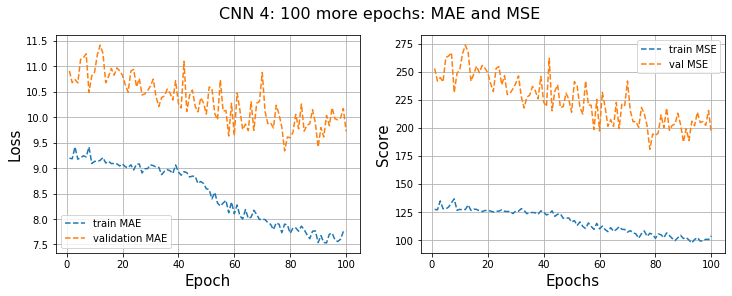

In [33]:
lr_plot_reg(historyr2,'CNN 4: 100 more epochs: MAE and MSE')

In [32]:
historyr3 = modelCNN4.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_vali, y_vali)
                       )

Epoch 1/100
25/25 [==============================] - 2s 67ms/step - loss: 98.1848 - mean_squared_error: 98.1848 - mean_absolute_error: 7.5383 - root_mean_squared_error: 9.9088 - val_loss: 206.4499 - val_mean_squared_error: 206.4499 - val_mean_absolute_error: 9.9961 - val_root_mean_squared_error: 14.3684
Epoch 2/100
25/25 [==============================] - 2s 68ms/step - loss: 99.1331 - mean_squared_error: 99.1331 - mean_absolute_error: 7.5932 - root_mean_squared_error: 9.9566 - val_loss: 206.6401 - val_mean_squared_error: 206.6401 - val_mean_absolute_error: 10.0536 - val_root_mean_squared_error: 14.3750
Epoch 3/100
25/25 [==============================] - 2s 68ms/step - loss: 101.5709 - mean_squared_error: 101.5709 - mean_absolute_error: 7.6331 - root_mean_squared_error: 10.0782 - val_loss: 217.1546 - val_mean_squared_error: 217.1546 - val_mean_absolute_error: 10.2443 - val_root_mean_squared_error: 14.7362
Epoch 4/100
25/25 [==============================] - 2s 69ms/step - loss: 97.759

Epoch 28/100
25/25 [==============================] - 2s 86ms/step - loss: 96.4853 - mean_squared_error: 96.4853 - mean_absolute_error: 7.4820 - root_mean_squared_error: 9.8227 - val_loss: 178.4312 - val_mean_squared_error: 178.4312 - val_mean_absolute_error: 9.1734 - val_root_mean_squared_error: 13.3578
Epoch 29/100
25/25 [==============================] - 2s 90ms/step - loss: 93.4120 - mean_squared_error: 93.4120 - mean_absolute_error: 7.3822 - root_mean_squared_error: 9.6650 - val_loss: 182.8931 - val_mean_squared_error: 182.8931 - val_mean_absolute_error: 9.2700 - val_root_mean_squared_error: 13.5238
Epoch 30/100
25/25 [==============================] - 2s 89ms/step - loss: 97.4309 - mean_squared_error: 97.4309 - mean_absolute_error: 7.4177 - root_mean_squared_error: 9.8707 - val_loss: 177.1617 - val_mean_squared_error: 177.1617 - val_mean_absolute_error: 9.1532 - val_root_mean_squared_error: 13.3102
Epoch 31/100
25/25 [==============================] - 2s 87ms/step - loss: 94.0418

Epoch 55/100
25/25 [==============================] - 2s 83ms/step - loss: 86.1020 - mean_squared_error: 86.1020 - mean_absolute_error: 7.0384 - root_mean_squared_error: 9.2791 - val_loss: 178.6169 - val_mean_squared_error: 178.6169 - val_mean_absolute_error: 9.1624 - val_root_mean_squared_error: 13.3648
Epoch 56/100
25/25 [==============================] - 2s 83ms/step - loss: 90.4488 - mean_squared_error: 90.4488 - mean_absolute_error: 7.2218 - root_mean_squared_error: 9.5105 - val_loss: 172.8548 - val_mean_squared_error: 172.8548 - val_mean_absolute_error: 9.0084 - val_root_mean_squared_error: 13.1474
Epoch 57/100
25/25 [==============================] - 2s 83ms/step - loss: 91.1667 - mean_squared_error: 91.1667 - mean_absolute_error: 7.1828 - root_mean_squared_error: 9.5481 - val_loss: 158.6295 - val_mean_squared_error: 158.6295 - val_mean_absolute_error: 8.5512 - val_root_mean_squared_error: 12.5948
Epoch 58/100
25/25 [==============================] - 2s 82ms/step - loss: 87.8039

Epoch 82/100
25/25 [==============================] - 2s 100ms/step - loss: 80.7596 - mean_squared_error: 80.7596 - mean_absolute_error: 6.7407 - root_mean_squared_error: 8.9866 - val_loss: 162.9072 - val_mean_squared_error: 162.9072 - val_mean_absolute_error: 8.6886 - val_root_mean_squared_error: 12.7635
Epoch 83/100
25/25 [==============================] - 3s 101ms/step - loss: 80.8158 - mean_squared_error: 80.8158 - mean_absolute_error: 6.8057 - root_mean_squared_error: 8.9898 - val_loss: 173.5691 - val_mean_squared_error: 173.5691 - val_mean_absolute_error: 8.9721 - val_root_mean_squared_error: 13.1746
Epoch 84/100
25/25 [==============================] - 2s 90ms/step - loss: 84.7438 - mean_squared_error: 84.7438 - mean_absolute_error: 6.9434 - root_mean_squared_error: 9.2056 - val_loss: 176.5634 - val_mean_squared_error: 176.5634 - val_mean_absolute_error: 9.0528 - val_root_mean_squared_error: 13.2877
Epoch 85/100
25/25 [==============================] - 2s 88ms/step - loss: 80.26

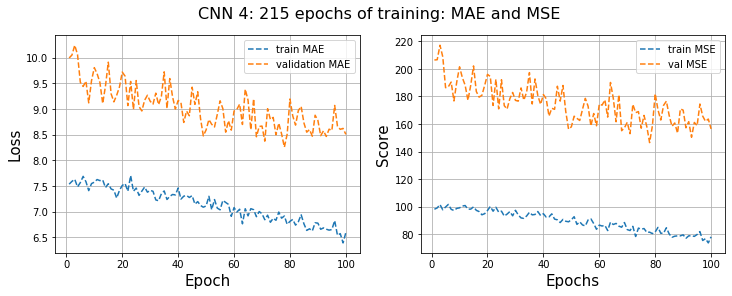

In [36]:
lr_plot_reg(historyr3,'CNN 4: 215 epochs of training: MAE and MSE')

In [37]:
historyr4 = modelCNN4.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_vali, y_vali)
                       )

Epoch 1/100
25/25 [==============================] - 2s 66ms/step - loss: 71.7898 - mean_squared_error: 71.7898 - mean_absolute_error: 6.3241 - root_mean_squared_error: 8.4729 - val_loss: 161.4603 - val_mean_squared_error: 161.4603 - val_mean_absolute_error: 8.7095 - val_root_mean_squared_error: 12.7067
Epoch 2/100
25/25 [==============================] - 2s 71ms/step - loss: 77.0050 - mean_squared_error: 77.0050 - mean_absolute_error: 6.6158 - root_mean_squared_error: 8.7753 - val_loss: 164.1601 - val_mean_squared_error: 164.1601 - val_mean_absolute_error: 8.7009 - val_root_mean_squared_error: 12.8125
Epoch 3/100
25/25 [==============================] - 2s 71ms/step - loss: 76.1474 - mean_squared_error: 76.1474 - mean_absolute_error: 6.4971 - root_mean_squared_error: 8.7262 - val_loss: 157.3158 - val_mean_squared_error: 157.3158 - val_mean_absolute_error: 8.5700 - val_root_mean_squared_error: 12.5426
Epoch 4/100
25/25 [==============================] - 2s 67ms/step - loss: 74.8335 - m

Epoch 28/100
25/25 [==============================] - 2s 82ms/step - loss: 71.4226 - mean_squared_error: 71.4226 - mean_absolute_error: 6.3217 - root_mean_squared_error: 8.4512 - val_loss: 146.7695 - val_mean_squared_error: 146.7695 - val_mean_absolute_error: 8.3851 - val_root_mean_squared_error: 12.1148
Epoch 29/100
25/25 [==============================] - 2s 85ms/step - loss: 64.7666 - mean_squared_error: 64.7666 - mean_absolute_error: 6.1811 - root_mean_squared_error: 8.0478 - val_loss: 160.5140 - val_mean_squared_error: 160.5140 - val_mean_absolute_error: 8.8740 - val_root_mean_squared_error: 12.6694
Epoch 30/100
25/25 [==============================] - 2s 82ms/step - loss: 70.1899 - mean_squared_error: 70.1899 - mean_absolute_error: 6.3066 - root_mean_squared_error: 8.3779 - val_loss: 155.4734 - val_mean_squared_error: 155.4734 - val_mean_absolute_error: 8.4479 - val_root_mean_squared_error: 12.4689
Epoch 31/100
25/25 [==============================] - 2s 82ms/step - loss: 69.3771

Epoch 55/100
25/25 [==============================] - 2s 81ms/step - loss: 58.7571 - mean_squared_error: 58.7571 - mean_absolute_error: 5.9276 - root_mean_squared_error: 7.6653 - val_loss: 154.4917 - val_mean_squared_error: 154.4917 - val_mean_absolute_error: 8.6218 - val_root_mean_squared_error: 12.4295
Epoch 56/100
25/25 [==============================] - 2s 82ms/step - loss: 58.5730 - mean_squared_error: 58.5730 - mean_absolute_error: 5.7192 - root_mean_squared_error: 7.6533 - val_loss: 136.9525 - val_mean_squared_error: 136.9525 - val_mean_absolute_error: 8.2474 - val_root_mean_squared_error: 11.7027
Epoch 57/100
25/25 [==============================] - 2s 81ms/step - loss: 60.1978 - mean_squared_error: 60.1978 - mean_absolute_error: 5.8645 - root_mean_squared_error: 7.7587 - val_loss: 144.7553 - val_mean_squared_error: 144.7553 - val_mean_absolute_error: 8.2754 - val_root_mean_squared_error: 12.0314
Epoch 58/100
25/25 [==============================] - 2s 81ms/step - loss: 59.0588

Epoch 82/100
25/25 [==============================] - 2s 81ms/step - loss: 50.2327 - mean_squared_error: 50.2327 - mean_absolute_error: 5.3498 - root_mean_squared_error: 7.0875 - val_loss: 147.7675 - val_mean_squared_error: 147.7675 - val_mean_absolute_error: 8.4727 - val_root_mean_squared_error: 12.1560
Epoch 83/100
25/25 [==============================] - 2s 82ms/step - loss: 50.9885 - mean_squared_error: 50.9885 - mean_absolute_error: 5.4444 - root_mean_squared_error: 7.1406 - val_loss: 150.4213 - val_mean_squared_error: 150.4213 - val_mean_absolute_error: 8.3013 - val_root_mean_squared_error: 12.2646
Epoch 84/100
25/25 [==============================] - 2s 82ms/step - loss: 51.8932 - mean_squared_error: 51.8932 - mean_absolute_error: 5.4620 - root_mean_squared_error: 7.2037 - val_loss: 152.6209 - val_mean_squared_error: 152.6209 - val_mean_absolute_error: 8.5051 - val_root_mean_squared_error: 12.3540
Epoch 85/100
25/25 [==============================] - 2s 85ms/step - loss: 53.7512

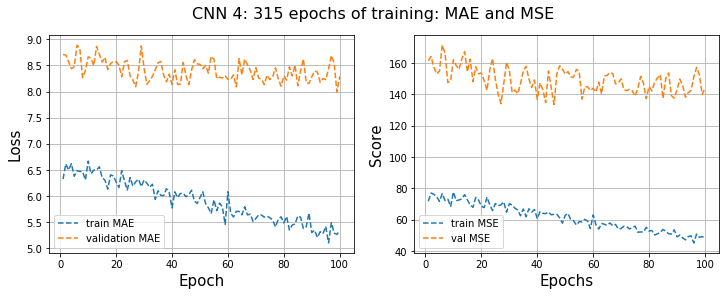

In [39]:
lr_plot_reg(historyr4,'CNN 4: 315 epochs of training: MAE and MSE')

In [41]:
#lets see what the whole learning curve would look like
historyr_45 = historyr.history['val_mean_squared_error']
historyr_45.extend(historyr2.history['val_mean_squared_error'])
historyr_45.extend(historyr3.history['val_mean_squared_error'])
historyr_45.extend(historyr4.history['val_mean_squared_error'])

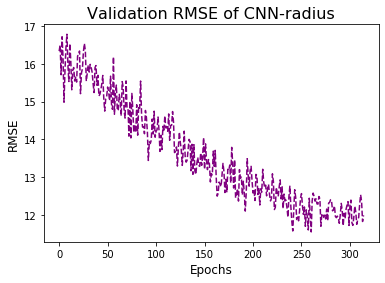

In [44]:
plt.plot(list(range(len(historyr_45))),np.sqrt(historyr_45),'--',color='purple')
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('RMSE',fontsize=12)
plt.title('Validation RMSE of CNN-radius',fontsize=16)
plt.savefig('images/cnnr_45.png')

In [45]:
#modelCNNr.summary()

In [167]:
#modelCNNr.save("radius_model.h5")

### Lets try some Augmentation

In [ ]:
# let try some augmentations
X_train.shape

In [30]:
X_train[0].reshape(110,110).shape

(110, 110)

Text(0.5, 1.0, 'Radius = 30.81')

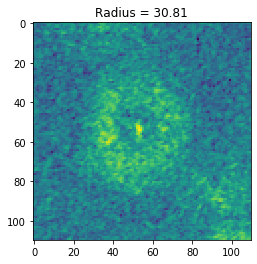

In [47]:
plt.imshow(X_train[0].reshape(110,110))
plt.title(f'Radius = {y_train[0]}')

Text(0.5, 1.0, 'flipped horazontaly')

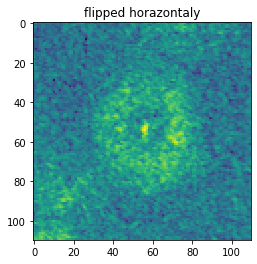

In [45]:
#flip horazontaly
im = X_train[0]
imflipped = tf.image.flip_left_right(im)
plt.imshow(imflipped.numpy().reshape(110,110))
plt.title(f'flipped horazontaly')

In [ ]:
from src.volcano import augment_plot

In [161]:
def augment_plot(X_train, idx):
    im = X_train[idx]
    im_lr= tf.image.random_flip_left_right(im)
    im_ud = tf.image.random_flip_up_down(im)
    im_crop = tf.image.random_crop(im,size=(95,95,1))
    im_crop = tf.image.resize(im_crop,size=(110,110))
    
    fig, axs = plt.subplots(1,4,figsize=(10,10))
    #fig.suptitle('Augmentation Example')

    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])
    
    axs.flatten()[0].imshow(im.reshape(110,110))
    axs.flatten()[0].set_title('original')
    axs.flatten()[1].imshow(im_lr.numpy().reshape(110,110))
    axs.flatten()[1].set_title('rand. left or right')
    axs.flatten()[2].imshow(im_ud.numpy().reshape(110,110))
    axs.flatten()[2].set_title('rand. up or down')
    axs.flatten()[3].imshow(im_crop.numpy().reshape(110,110))
    axs.flatten()[3].set_title('random crop') 
    plt.tight_layout()
   # plt.savefig('images/aug_examples.png')
    
    

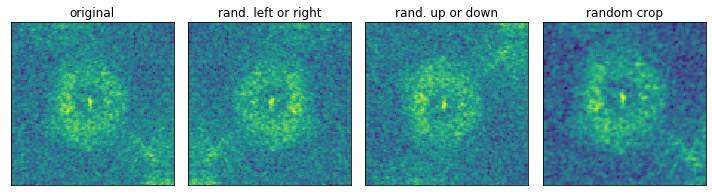

In [302]:
augment_plot(X_train,0)

In [ ]:
from src.volcano import augment1

In [ ]:
from src.volcano import train_generator

In [248]:
i,j = next(train_generator(X_train,y_train))

In [67]:
#historyr32 = modelCNN4.fit(train_generator(X_train,y_train,batch_size=4), epochs=100, steps_per_epoch=200, 
#                        validation_data=(X_vali, y_vali)
#                       )


In [281]:
modelCNN4.save("radius_model.h5")

BElow Itest out epoch time with different augentations active in my function

In [305]:
historyr33 = modelCNN4.fit(train_generator(X_train,y_train,batch_size=4), epochs=1, steps_per_epoch=200, 
                        validation_data=(X_vali, y_vali)
                       )


200/200 [==============================] - 659s 3s/step - loss: 67.6231 - mean_squared_error: 67.6231 - val_loss: 145.0037 - val_mean_squared_error: 145.0037


In [306]:
660/60 #per epochjust crop

11.0

In [307]:
historyr33 = modelCNN4.fit(train_generator(X_train,y_train,batch_size=4), epochs=1, steps_per_epoch=200, 
                        validation_data=(X_vali, y_vali)
                       )

200/200 [==============================] - 766s 4s/step - loss: 91.8442 - mean_squared_error: 91.8442 - val_loss: 144.0918 - val_mean_squared_error: 144.0918


In [312]:
# I decide to try out just cropping and fliping in one diresction for a couple ours
historyr34 = modelCNN4.fit(train_generator(X_train,y_train,batch_size=8), epochs=5, steps_per_epoch=100, 
                        validation_data=(X_vali, y_vali)
                       )

Epoch 1/5
100/100 [==============================] - 1432s 14s/step - loss: 92.3775 - mean_squared_error: 92.3775 - val_loss: 138.9305 - val_mean_squared_error: 138.9305
Epoch 2/5
100/100 [==============================] - 1554s 16s/step - loss: 100.4395 - mean_squared_error: 100.4395 - val_loss: 137.5279 - val_mean_squared_error: 137.5279
Epoch 3/5
100/100 [==============================] - 1249s 12s/step - loss: 79.8918 - mean_squared_error: 79.8918 - val_loss: 133.3634 - val_mean_squared_error: 133.3634
Epoch 4/5
100/100 [==============================] - 1146s 11s/step - loss: 87.1664 - mean_squared_error: 87.1664 - val_loss: 138.9545 - val_mean_squared_error: 138.9545
Epoch 5/5
100/100 [==============================] - 1231s 12s/step - loss: 88.8327 - mean_squared_error: 88.8327 - val_loss: 138.0427 - val_mean_squared_error: 138.0427


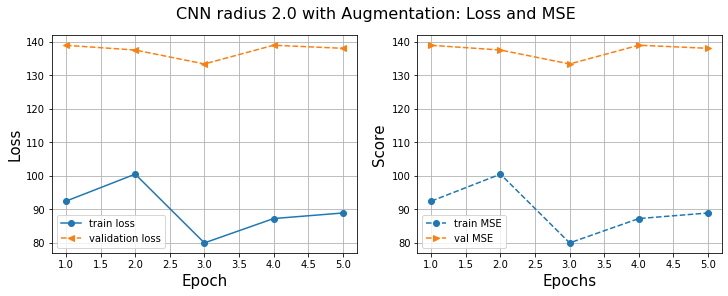

In [318]:
lr_plot_reg(historyr34,'CNN radius 2.0 with Augmentation: Loss and MSE')


## MAkeing a deeper cnn

In [78]:
#deeper
modelCNN5 = Sequential()
modelCNN5.add(Conv2D(6, kernel_size = (3,3), activation = 'relu', input_shape = (img_rows, img_cols, 1)))
modelCNN5.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN5.add(Dropout(0.5))
modelCNN5.add(Conv2D(12, kernel_size = (3,3), activation = 'relu'))
modelCNN5.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN5.add(Dropout(0.5))
modelCNN5.add(Conv2D(24, kernel_size = (3,3), activation = 'relu'))
modelCNN5.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN5.add(Dropout(0.5))
modelCNN5.add(Conv2D(48, kernel_size = (3,3), activation = 'relu'))
modelCNN5.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN5.add(Dropout(0.5))
modelCNN5.add(Flatten())
modelCNN5.add(Dense(24,activation = 'relu'))
modelCNN5.add(Dense(12,activation = 'relu'))
modelCNN5.add(Dense(1, activation = 'linear'))


In [79]:
modelCNN5.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error','mean_absolute_error','RootMeanSquaredError'])

In [80]:
modelCNN5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 108, 108, 6)       60        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 6)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 54, 54, 6)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 52, 52, 12)        660       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 26, 26, 12)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 26, 26, 12)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 24)       

In [81]:
historyr5 = modelCNN5.fit(X_train,y_train, epochs=200, batch_size=32, 
                        validation_data=(X_vali, y_vali)
                       )

Epoch 1/200
25/25 [==============================] - 3s 102ms/step - loss: 206.2908 - mean_squared_error: 206.2908 - mean_absolute_error: 11.1300 - root_mean_squared_error: 14.3628 - val_loss: 337.5140 - val_mean_squared_error: 337.5140 - val_mean_absolute_error: 13.3586 - val_root_mean_squared_error: 18.3716
Epoch 2/200
25/25 [==============================] - 2s 97ms/step - loss: 131.3891 - mean_squared_error: 131.3891 - mean_absolute_error: 9.3387 - root_mean_squared_error: 11.4625 - val_loss: 328.2264 - val_mean_squared_error: 328.2264 - val_mean_absolute_error: 13.0377 - val_root_mean_squared_error: 18.1170
Epoch 3/200
25/25 [==============================] - 2s 98ms/step - loss: 134.6362 - mean_squared_error: 134.6362 - mean_absolute_error: 9.3693 - root_mean_squared_error: 11.6033 - val_loss: 314.7844 - val_mean_squared_error: 314.7844 - val_mean_absolute_error: 12.5976 - val_root_mean_squared_error: 17.7422
Epoch 4/200
25/25 [==============================] - 3s 119ms/step - lo

25/25 [==============================] - 3s 127ms/step - loss: 128.5546 - mean_squared_error: 128.5546 - mean_absolute_error: 9.2265 - root_mean_squared_error: 11.3382 - val_loss: 287.8134 - val_mean_squared_error: 287.8134 - val_mean_absolute_error: 11.8014 - val_root_mean_squared_error: 16.9651
Epoch 28/200
25/25 [==============================] - 3s 119ms/step - loss: 129.4350 - mean_squared_error: 129.4350 - mean_absolute_error: 9.2246 - root_mean_squared_error: 11.3770 - val_loss: 284.1213 - val_mean_squared_error: 284.1213 - val_mean_absolute_error: 11.6994 - val_root_mean_squared_error: 16.8559
Epoch 29/200
25/25 [==============================] - 3s 126ms/step - loss: 128.2281 - mean_squared_error: 128.2281 - mean_absolute_error: 9.2406 - root_mean_squared_error: 11.3238 - val_loss: 280.5909 - val_mean_squared_error: 280.5909 - val_mean_absolute_error: 11.6040 - val_root_mean_squared_error: 16.7508
Epoch 30/200
25/25 [==============================] - 3s 121ms/step - loss: 130.

25/25 [==============================] - 4s 141ms/step - loss: 132.6729 - mean_squared_error: 132.6729 - mean_absolute_error: 9.3289 - root_mean_squared_error: 11.5184 - val_loss: 267.2592 - val_mean_squared_error: 267.2592 - val_mean_absolute_error: 11.2711 - val_root_mean_squared_error: 16.3481
Epoch 54/200
25/25 [==============================] - 3s 125ms/step - loss: 128.5958 - mean_squared_error: 128.5958 - mean_absolute_error: 9.2277 - root_mean_squared_error: 11.3400 - val_loss: 267.0301 - val_mean_squared_error: 267.0301 - val_mean_absolute_error: 11.2658 - val_root_mean_squared_error: 16.3411
Epoch 55/200
25/25 [==============================] - 3s 130ms/step - loss: 129.4419 - mean_squared_error: 129.4419 - mean_absolute_error: 9.2656 - root_mean_squared_error: 11.3773 - val_loss: 255.9819 - val_mean_squared_error: 255.9819 - val_mean_absolute_error: 11.0193 - val_root_mean_squared_error: 15.9994
Epoch 56/200
25/25 [==============================] - 3s 128ms/step - loss: 130.

25/25 [==============================] - 4s 153ms/step - loss: 128.1647 - mean_squared_error: 128.1647 - mean_absolute_error: 9.2374 - root_mean_squared_error: 11.3210 - val_loss: 282.8914 - val_mean_squared_error: 282.8914 - val_mean_absolute_error: 11.6780 - val_root_mean_squared_error: 16.8194
Epoch 80/200
25/25 [==============================] - 3s 131ms/step - loss: 129.3581 - mean_squared_error: 129.3581 - mean_absolute_error: 9.2606 - root_mean_squared_error: 11.3736 - val_loss: 266.5721 - val_mean_squared_error: 266.5721 - val_mean_absolute_error: 11.2507 - val_root_mean_squared_error: 16.3270
Epoch 81/200
25/25 [==============================] - 3s 129ms/step - loss: 129.2158 - mean_squared_error: 129.2158 - mean_absolute_error: 9.2530 - root_mean_squared_error: 11.3673 - val_loss: 265.8902 - val_mean_squared_error: 265.8902 - val_mean_absolute_error: 11.2338 - val_root_mean_squared_error: 16.3061
Epoch 82/200
25/25 [==============================] - 3s 133ms/step - loss: 130.

25/25 [==============================] - 4s 164ms/step - loss: 133.1791 - mean_squared_error: 133.1791 - mean_absolute_error: 9.3236 - root_mean_squared_error: 11.5403 - val_loss: 302.4818 - val_mean_squared_error: 302.4818 - val_mean_absolute_error: 12.2522 - val_root_mean_squared_error: 17.3920
Epoch 106/200
25/25 [==============================] - 3s 136ms/step - loss: 126.9905 - mean_squared_error: 126.9905 - mean_absolute_error: 9.1888 - root_mean_squared_error: 11.2690 - val_loss: 285.7534 - val_mean_squared_error: 285.7534 - val_mean_absolute_error: 11.7702 - val_root_mean_squared_error: 16.9042
Epoch 107/200
25/25 [==============================] - 3s 134ms/step - loss: 127.3058 - mean_squared_error: 127.3058 - mean_absolute_error: 9.1611 - root_mean_squared_error: 11.2830 - val_loss: 264.5899 - val_mean_squared_error: 264.5899 - val_mean_absolute_error: 11.2152 - val_root_mean_squared_error: 16.2662
Epoch 108/200
25/25 [==============================] - 3s 126ms/step - loss: 1

25/25 [==============================] - 3s 127ms/step - loss: 128.2759 - mean_squared_error: 128.2759 - mean_absolute_error: 9.1279 - root_mean_squared_error: 11.3259 - val_loss: 246.6558 - val_mean_squared_error: 246.6558 - val_mean_absolute_error: 10.8173 - val_root_mean_squared_error: 15.7053
Epoch 132/200
25/25 [==============================] - 3s 134ms/step - loss: 131.2738 - mean_squared_error: 131.2738 - mean_absolute_error: 9.3744 - root_mean_squared_error: 11.4575 - val_loss: 264.2433 - val_mean_squared_error: 264.2433 - val_mean_absolute_error: 11.2062 - val_root_mean_squared_error: 16.2556
Epoch 133/200
25/25 [==============================] - 3s 140ms/step - loss: 127.7038 - mean_squared_error: 127.7038 - mean_absolute_error: 9.2279 - root_mean_squared_error: 11.3006 - val_loss: 290.5337 - val_mean_squared_error: 290.5337 - val_mean_absolute_error: 11.9009 - val_root_mean_squared_error: 17.0450
Epoch 134/200
25/25 [==============================] - 3s 129ms/step - loss: 1

25/25 [==============================] - 3s 123ms/step - loss: 128.4283 - mean_squared_error: 128.4283 - mean_absolute_error: 9.2705 - root_mean_squared_error: 11.3326 - val_loss: 174.3215 - val_mean_squared_error: 174.3215 - val_mean_absolute_error: 9.7577 - val_root_mean_squared_error: 13.2031
Epoch 158/200
25/25 [==============================] - 3s 122ms/step - loss: 126.7473 - mean_squared_error: 126.7473 - mean_absolute_error: 9.1319 - root_mean_squared_error: 11.2582 - val_loss: 171.4524 - val_mean_squared_error: 171.4524 - val_mean_absolute_error: 9.7096 - val_root_mean_squared_error: 13.0940
Epoch 159/200
25/25 [==============================] - 3s 127ms/step - loss: 128.4805 - mean_squared_error: 128.4805 - mean_absolute_error: 9.2039 - root_mean_squared_error: 11.3349 - val_loss: 166.5234 - val_mean_squared_error: 166.5234 - val_mean_absolute_error: 9.7030 - val_root_mean_squared_error: 12.9044
Epoch 160/200
25/25 [==============================] - 3s 124ms/step - loss: 128.

25/25 [==============================] - 4s 141ms/step - loss: 125.6740 - mean_squared_error: 125.6740 - mean_absolute_error: 9.0790 - root_mean_squared_error: 11.2104 - val_loss: 165.3636 - val_mean_squared_error: 165.3636 - val_mean_absolute_error: 9.5127 - val_root_mean_squared_error: 12.8594
Epoch 184/200
25/25 [==============================] - 3s 133ms/step - loss: 125.7702 - mean_squared_error: 125.7702 - mean_absolute_error: 9.1002 - root_mean_squared_error: 11.2147 - val_loss: 162.1530 - val_mean_squared_error: 162.1530 - val_mean_absolute_error: 9.4676 - val_root_mean_squared_error: 12.7339
Epoch 185/200
25/25 [==============================] - 3s 127ms/step - loss: 124.4967 - mean_squared_error: 124.4967 - mean_absolute_error: 9.0730 - root_mean_squared_error: 11.1578 - val_loss: 162.1299 - val_mean_squared_error: 162.1299 - val_mean_absolute_error: 9.4412 - val_root_mean_squared_error: 12.7330
Epoch 186/200
25/25 [==============================] - 3s 128ms/step - loss: 126.

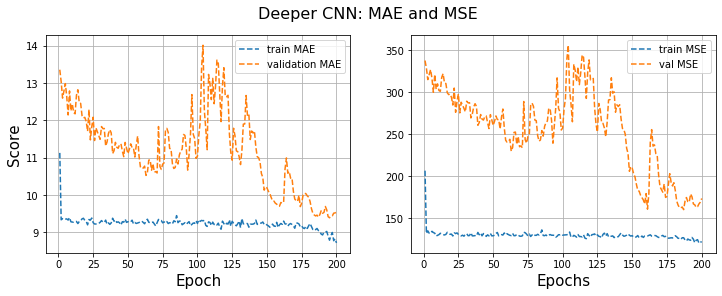

In [88]:
lr_plot_reg(historyr5,'Deeper CNN: MAE and MSE ')

In [100]:
historyr6 = modelCNN5.fit(X_train,y_train, epochs=115, batch_size=32, 
                        validation_data=(X_vali, y_vali)
                       )

Epoch 1/115
25/25 [==============================] - 2s 97ms/step - loss: 118.0109 - mean_squared_error: 118.0109 - mean_absolute_error: 8.6444 - root_mean_squared_error: 10.8633 - val_loss: 167.3986 - val_mean_squared_error: 167.3986 - val_mean_absolute_error: 9.4270 - val_root_mean_squared_error: 12.9383
Epoch 2/115
25/25 [==============================] - 2s 100ms/step - loss: 121.6167 - mean_squared_error: 121.6167 - mean_absolute_error: 8.6953 - root_mean_squared_error: 11.0280 - val_loss: 172.4351 - val_mean_squared_error: 172.4351 - val_mean_absolute_error: 9.5562 - val_root_mean_squared_error: 13.1315
Epoch 3/115
25/25 [==============================] - 3s 101ms/step - loss: 118.0443 - mean_squared_error: 118.0443 - mean_absolute_error: 8.6815 - root_mean_squared_error: 10.8648 - val_loss: 170.0608 - val_mean_squared_error: 170.0608 - val_mean_absolute_error: 9.4665 - val_root_mean_squared_error: 13.0407
Epoch 4/115
25/25 [==============================] - 3s 101ms/step - loss:

25/25 [==============================] - 4s 149ms/step - loss: 114.0006 - mean_squared_error: 114.0006 - mean_absolute_error: 8.4390 - root_mean_squared_error: 10.6771 - val_loss: 155.8898 - val_mean_squared_error: 155.8898 - val_mean_absolute_error: 9.4992 - val_root_mean_squared_error: 12.4856
Epoch 28/115
25/25 [==============================] - 3s 127ms/step - loss: 111.5434 - mean_squared_error: 111.5434 - mean_absolute_error: 8.2972 - root_mean_squared_error: 10.5614 - val_loss: 165.0077 - val_mean_squared_error: 165.0077 - val_mean_absolute_error: 9.4683 - val_root_mean_squared_error: 12.8455
Epoch 29/115
25/25 [==============================] - 3s 130ms/step - loss: 113.8681 - mean_squared_error: 113.8681 - mean_absolute_error: 8.2829 - root_mean_squared_error: 10.6709 - val_loss: 164.2977 - val_mean_squared_error: 164.2977 - val_mean_absolute_error: 9.4630 - val_root_mean_squared_error: 12.8179
Epoch 30/115
25/25 [==============================] - 3s 135ms/step - loss: 114.096

25/25 [==============================] - 3s 128ms/step - loss: 112.8403 - mean_squared_error: 112.8403 - mean_absolute_error: 8.1498 - root_mean_squared_error: 10.6226 - val_loss: 154.0057 - val_mean_squared_error: 154.0057 - val_mean_absolute_error: 9.3610 - val_root_mean_squared_error: 12.4099
Epoch 54/115
25/25 [==============================] - 3s 132ms/step - loss: 113.0358 - mean_squared_error: 113.0358 - mean_absolute_error: 8.3000 - root_mean_squared_error: 10.6318 - val_loss: 157.5752 - val_mean_squared_error: 157.5752 - val_mean_absolute_error: 9.3130 - val_root_mean_squared_error: 12.5529
Epoch 55/115
25/25 [==============================] - 4s 147ms/step - loss: 116.1349 - mean_squared_error: 116.1349 - mean_absolute_error: 8.2781 - root_mean_squared_error: 10.7766 - val_loss: 155.9685 - val_mean_squared_error: 155.9685 - val_mean_absolute_error: 9.3939 - val_root_mean_squared_error: 12.4887
Epoch 56/115
25/25 [==============================] - 4s 146ms/step - loss: 112.433

25/25 [==============================] - 3s 115ms/step - loss: 109.9651 - mean_squared_error: 109.9651 - mean_absolute_error: 7.9733 - root_mean_squared_error: 10.4864 - val_loss: 152.7486 - val_mean_squared_error: 152.7486 - val_mean_absolute_error: 9.2470 - val_root_mean_squared_error: 12.3592
Epoch 80/115
25/25 [==============================] - 3s 107ms/step - loss: 105.4745 - mean_squared_error: 105.4745 - mean_absolute_error: 7.9958 - root_mean_squared_error: 10.2701 - val_loss: 151.0077 - val_mean_squared_error: 151.0077 - val_mean_absolute_error: 9.0564 - val_root_mean_squared_error: 12.2885
Epoch 81/115
25/25 [==============================] - 3s 104ms/step - loss: 107.6864 - mean_squared_error: 107.6864 - mean_absolute_error: 7.8946 - root_mean_squared_error: 10.3772 - val_loss: 146.6257 - val_mean_squared_error: 146.6257 - val_mean_absolute_error: 9.1009 - val_root_mean_squared_error: 12.1089
Epoch 82/115
25/25 [==============================] - 3s 103ms/step - loss: 107.467

25/25 [==============================] - 3s 105ms/step - loss: 104.1797 - mean_squared_error: 104.1797 - mean_absolute_error: 7.7719 - root_mean_squared_error: 10.2068 - val_loss: 140.1906 - val_mean_squared_error: 140.1906 - val_mean_absolute_error: 8.8506 - val_root_mean_squared_error: 11.8402
Epoch 106/115
25/25 [==============================] - 3s 107ms/step - loss: 109.3482 - mean_squared_error: 109.3482 - mean_absolute_error: 8.0582 - root_mean_squared_error: 10.4570 - val_loss: 141.7927 - val_mean_squared_error: 141.7927 - val_mean_absolute_error: 9.1082 - val_root_mean_squared_error: 11.9077
Epoch 107/115
25/25 [==============================] - 3s 104ms/step - loss: 103.8746 - mean_squared_error: 103.8746 - mean_absolute_error: 7.7995 - root_mean_squared_error: 10.1919 - val_loss: 142.2946 - val_mean_squared_error: 142.2946 - val_mean_absolute_error: 9.0091 - val_root_mean_squared_error: 11.9287
Epoch 108/115
25/25 [==============================] - 3s 105ms/step - loss: 103.

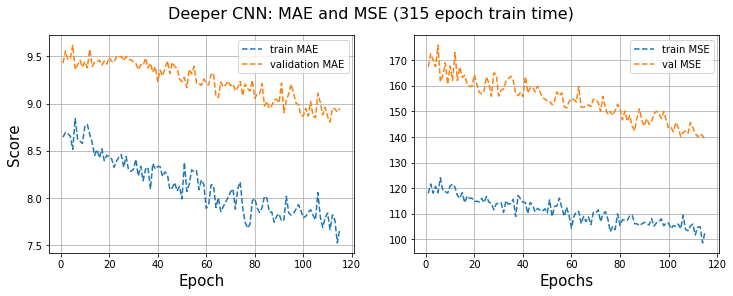

In [102]:
lr_plot_reg(historyr6,'Deeper CNN: MAE and MSE (315 epoch train time) ')

In [114]:
Xhold = pd.read_csv('volcanoe-data/volcanoes_test/test_images.csv',header= None)
yhold = pd.read_csv('volcanoe-data/volcanoes_test/test_labels.csv')

In [115]:
X_holdout = Xhold[yhold['Radius'].notnull()]
y_holdout = yhold[yhold['Radius'].notnull()]['Radius']
#normalizing image
X_holdout =  X_holdout/256

In [116]:
img_rows, img_cols = 110, 110

X_hold = X_holdout.values.reshape((-1, img_rows, img_cols, 1))
y_hold = y_holdout.values

In [92]:
#predict with augmentation CNN4
CNN4pred = modelCNN4(X_hold)

In [148]:
CNN4pred = CNN4pred.numpy().reshape(434)

In [144]:
#predict with deep model CNN5
CNN5pred = modelCNN5(X_hold)

In [145]:
CNN5pred = CNN5pred.numpy().reshape(434)

In [142]:
CNN5pred.reshape(434).shape

(434,)

In [146]:
res_deep = np.array(y_hold) - CNN5pred
rmse_deep = (np.average(res_deep**2))**.5

In [155]:
rmse_deep

10.423388970377193

In [150]:
res_aug = np.array(y_hold) - CNN4pred
rmse_aug = (np.average(res_aug**2))**.5

In [147]:
res_deep.shape

(434,)

In [151]:
rmse_aug

11.089099416240153

In [97]:
from sklearn.metrics import r2_score

In [152]:
#deeper
r2_score(y_hold,CNN5pred)

0.12315613848191387

In [153]:
#augment
r2_score(y_hold,CNN4pred)

0.007576748710077186

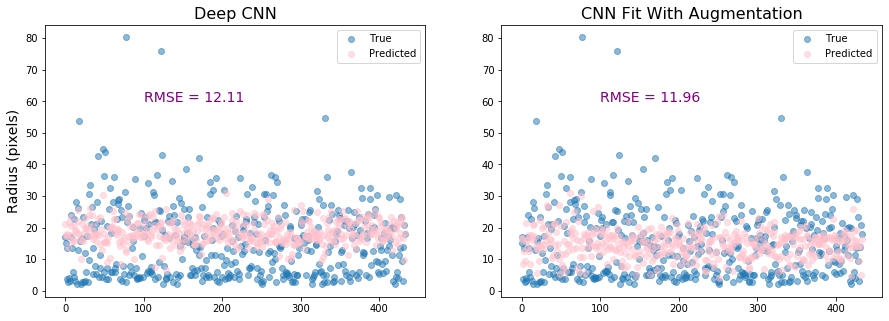

In [379]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
x = list(range(len(y_hold)))
axs[0].scatter(x,y_hold,alpha=.5,label='True')

axs[0].scatter(x,CNN5pred,alpha=.5,color='pink',label='Predicted')
axs[1].scatter(x,y_hold,alpha=.5,label='True')
axs[1].scatter(x,CNN4pred,alpha=.5,color='pink',label='Predicted')
axs[0].set_title('Deep CNN',fontsize=16)
axs[1].set_title('CNN Fit With Augmentation',fontsize=16)
axs[0].set_ylabel('Radius (pixels)',size=14)
axs[0].text(100,60,f'RMSE = {round(rmse_deep,2)}',color='purple',size=14)
axs[1].text(100,60,f'RMSE = {round(rmse_aug,2)}',color='purple',size=14)
axs[0].legend()
axs[1].legend()
plt.savefig('images/compare.png');

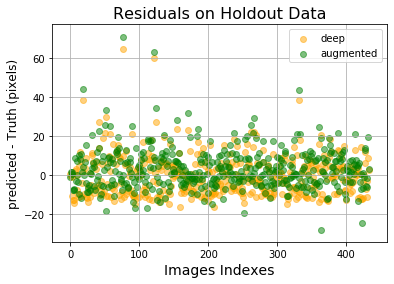

In [172]:
plt.scatter(list(range(len(res_deep))),res_deep,label='deep',marker='o',alpha=.5,color='orange')
plt.scatter(list(range(len(res_deep))),res_aug,label='augmented',marker='o',alpha=.5,color='green')
plt.legend()
plt.title('Residuals on Holdout Data',size=16)
plt.xlabel('Images Indexes',size=14)
plt.ylabel('predicted - Truth (pixels)',size=12)
plt.grid()
plt.savefig('images/residuals.png');

In [113]:
res_aug.shape

(434, 434)

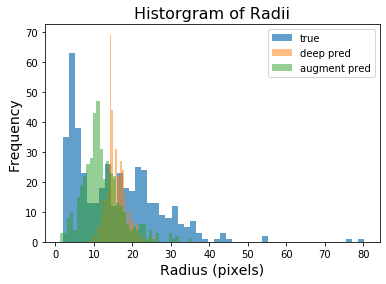

In [180]:


plt.hist(y_hold,alpha=.7,label='true',bins=50)
plt.hist(CNN5pred,alpha=.5,label='deep pred',bins=40)
plt.hist(CNN4pred,alpha=.5,label='augment pred',bins=40)
plt.legend()
plt.ylabel('Frequency',size=14)
plt.xlabel('Radius (pixels)',size=14)
plt.title('Historgram of Radii',size =16)
plt.savefig('images/compare_hist.png');

In [316]:
modelCNN4.save("radius_model4.h5")

In [323]:
modelCNN5.save('radius_model5.h5')

In [346]:
CNN5pred

<tf.Tensor: shape=(434, 1), dtype=float32, numpy=
array([[21.235262 ],
       [17.581385 ],
       [17.194609 ],
       [17.838902 ],
       [13.704307 ],
       [21.676882 ],
       [17.639004 ],
       [20.378363 ],
       [23.3418   ],
       [15.8097105],
       [16.502378 ],
       [15.8536625],
       [20.849707 ],
       [18.771719 ],
       [19.094229 ],
       [18.29325  ],
       [25.670544 ],
       [21.968233 ],
       [17.883924 ],
       [16.063742 ],
       [10.205775 ],
       [21.146746 ],
       [16.030333 ],
       [15.8263445],
       [18.185175 ],
       [19.996912 ],
       [23.110767 ],
       [19.707153 ],
       [20.419138 ],
       [17.498224 ],
       [19.562294 ],
       [23.881811 ],
       [26.333374 ],
       [17.326712 ],
       [24.129053 ],
       [16.251177 ],
       [20.626009 ],
       [18.676807 ],
       [17.61763  ],
       [15.904794 ],
       [17.991394 ],
       [18.086817 ],
       [22.710466 ],
       [17.705193 ],
       [23.292994 ],
     

Here I had to go back and fix a graph i made from a saved model for a the presentation. 

In [48]:
reconstructed_model_aug = keras.models.load_model("radius_model4.h5")


In [52]:
historyraug = reconstructed_model_aug.fit(X_train,y_train, epochs=5, batch_size=32, 
                        validation_data=(X_vali, y_vali))

Epoch 1/5
25/25 [==============================] - 2s 67ms/step - loss: 24.1841 - mean_squared_error: 24.1841 - val_loss: 141.0865 - val_mean_squared_error: 141.0865
Epoch 2/5
25/25 [==============================] - 2s 65ms/step - loss: 22.5113 - mean_squared_error: 22.5113 - val_loss: 138.7746 - val_mean_squared_error: 138.7746
Epoch 3/5
25/25 [==============================] - 2s 64ms/step - loss: 20.2762 - mean_squared_error: 20.2762 - val_loss: 139.2220 - val_mean_squared_error: 139.2220
Epoch 4/5
25/25 [==============================] - 2s 65ms/step - loss: 18.9507 - mean_squared_error: 18.9507 - val_loss: 138.9983 - val_mean_squared_error: 138.9983
Epoch 5/5
25/25 [==============================] - 2s 66ms/step - loss: 19.8038 - mean_squared_error: 19.8038 - val_loss: 138.5809 - val_mean_squared_error: 138.5809


In [66]:
def lr_plot_one(history_obj,model_name):
    ''' input : model , model_name : tf model, str'''
    history = history_obj.history
    x_arr = np.arange(len(history['loss']))+1
    fig = plt.figure(figsize=(12,4))
    ax= fig.add_subplot(1,2,1)
    ax.plot(x_arr,history['mean_squared_error'],'--o',label='train MSE')
    ax.plot(x_arr,history['val_mean_squared_error'],'--o',label='validation MSE')
    ax.legend()
    ax.set_xlabel('Epoch',size=15)
    ax.set_ylabel('MSE',size=15)
    plt.grid()
    plt.title('CNN 4 With Augmentation',size=16)


    #plt.savefig('/home/rachel/Galvanize/capstone2/Cap2-repo/images/lr_plot_aug4_a.png')
    #plt.show()

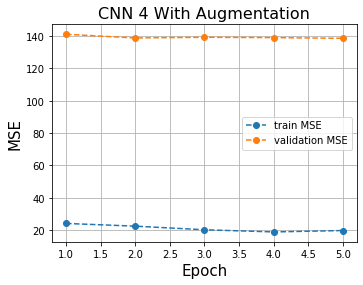

In [65]:
lr_plot_one(historyraug ,'testing this')

In [57]:
historyraug.history

{'loss': [24.184064865112305,
  22.51128387451172,
  20.276247024536133,
  18.950716018676758,
  19.803760528564453],
 'mean_squared_error': [24.184064865112305,
  22.51128387451172,
  20.276247024536133,
  18.950716018676758,
  19.803760528564453],
 'val_loss': [141.08653259277344,
  138.77462768554688,
  139.2219696044922,
  138.998291015625,
  138.58090209960938],
 'val_mean_squared_error': [141.08653259277344,
  138.77462768554688,
  139.2219696044922,
  138.998291015625,
  138.58090209960938]}